# CDS513 Assignment 1: Recommendation System in Python

*Opening Note:*

*This is a notebook to generate readings for RapidMiner input.*

## Overview

**1. [Problem Background](#background)**

**2. [Dataset Description](#data)**
- ***2.1. [File 1: `ratings.csv`](#data-ratings)***
- ***2.2. [File 2: `movies.csv`](#data-movies)***
- ***2.3. [File 3: `personality-data.csv`](#data-personality)***  
  <br/>
  
**3. [Data Analysis](#analysis)**

**4. [Data Preprocessing](#preprocessing)**
- ***4.1. [Remove Duplicates](#preprocessing-dup)***
- ***4.2. [Reduce Amount of Ratings Data](#preprocessing-reduce)***
  - 4.2.1. [Filter by rating year](#preprocessing-year)
  - 4.2.2. [Filter ratings by movie count](#preprocessing-movie-count)
  - 4.2.3. [Filter ratings by user count](#preprocessing-user-count)
  - 4.2.4. [Train-test split](#preprocess-split)
- ***4.3. [Generate Attributes for Movies](#preprocess-movie-attr)***
- ***4.4. [Generate Attributes for Users](#preprocess-user-attr)***

Import necessary packages for Recommender System.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

from collections import defaultdict

from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# And more.

Change numeric representation of float numbers in Pandas DataFrame.

In [2]:
pd.set_option('display.float_format', lambda x: '%2.4f' % x)

***

# 1. Problem Background <a name="background"></a>

<div style="text-align:center">=== Refer to the Assignment 1 Report. ===</div>

# 2. Dataset Description <a name="data"></a>

About the data: Personality 2018. Available at: https://grouplens.org/datasets/personality-2018/

Inspect the following file: `ratings.csv` ~and `personality-data.csv`~

## 2.1. File 1: `ratings.csv` <a name="data-ratings"></a>

Define the root directory to access the data.

In [3]:
DIRECTORY = 'data'

Load the data from `ratings.csv` into a Pandas DataFrame called `df_ratings` using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function. Set the parameter `skipinitialspace=True` when reading data from file: 

According to the documentation of the Pandas `read_csv()` function.


> **skipinitialspacebool : *default False***<br />
> - Skip spaces after delimiter.

In [4]:
file_ratings = f"{DIRECTORY}\\ratings.csv"
df_ratings = pd.read_csv(file_ratings, skipinitialspace=True)

Inspect the first 5 rows of `df_ratings` DataFrame.

In [5]:
display(df_ratings.head(5))
display(df_ratings.shape)

,useri,movie_id,rating,tstamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0000,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0000,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0000,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0000,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0000,2002-01-07 18:12:02


(1028751, 4)

**Note:** The `ratings.csv` file consists of 1,028,751 records.

Rename the columns of `df_ratings` DataFrame for more convenient data manipulations.

In [6]:
df_ratings.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
df_ratings.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp'], dtype='object')

**Note:** The file `ratings.csv` contains 4 columns:
- `user_id`
- `movie_id`
- `rating`
- `timestamp`

The first 3 columns `user_id`, `movie_id`, `ratings` will be used for collaborative filtering.

> Perform train-test split using `stratified` for simplicity.

Inspect the description of `df_ratings` DataFrame, including the types of its columns.

In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028751 entries, 0 to 1028750
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   user_id    1028751 non-null  object 
 1   movie_id   1028751 non-null  int64  
 2   rating     1028751 non-null  float64
 3   timestamp  1028751 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ MB


**Note:** There is no missing values in `df_ratings` DataFrame.

Inspect the values of the string columns in `df_ratings` DataFrame.

In [8]:
df_ratings.describe(include=[object])

,user_id,timestamp
count,1028751,1028751
unique,1820,964488
top,1a4926479ca0b4c42df6cefb89aa59d9,2016-04-23 12:32:53
freq,9286,106


##### User ID

- The total number of ratings are **1,028,751**.
- The number of unique users are **1,820**.
- The user who rates the most number of movies is **1a4926479ca0b4c42df6cefb89aa59d9**, with a total of **9,286** movies rated. 

Inspect the values of the numeric columns in `df_ratings` DataFrame.

In [9]:
df_ratings.describe(include=[np.number])

,movie_id,rating
count,1028751.0000,1028751.0000
mean,40838.2487,3.3702
std,48445.3473,1.0101
min,1.0000,0.5000
25%,2628.0000,3.0000
50%,7361.0000,3.5000
75%,74754.0000,4.0000
max,198117.0000,5.0000


##### Ratings

- The minimum and maximum ratings given by the users are **0.5** and **5.0** respectively.
- More than **50%** of the total ratings given by the users are **3.5** and above.

##### Movies

- The movie ID ranges from **1** to **198117**. 

Run the following cell to answer the two questions below:
- How many unique users and the corresponding number of movies they have rated?
- How many unique movies and the corresponding number of ratings received?

In [10]:
print(f"# unique users: {df_ratings['user_id'].nunique()}")
print("Number of ratings given by the users:\n===")
print(df_ratings['user_id'].value_counts())

print(f"\n# unique movies: {df_ratings['movie_id'].nunique()}")
print("Number of ratings received by the movies:\n===")
print(df_ratings['movie_id'].value_counts())

# unique users: 1820
Number of ratings given by the users:
===
1a4926479ca0b4c42df6cefb89aa59d9    9286
030001ac2145a938b07e686a35a2d638    8663
5251c36a5e4898da28a44a17b065a6b6    7940
b54372490fb6e3ccace51c0e3541db08    6743
8e7cebf9a234c064b75016249f2ac65e    6419
                                    ... 
c8e7cc901691e1af1acca7bd18008748      15
b907feed50762a0a68d150a4a5a876fb      15
1a281dc93cf31e7df7c675af254d3a33      15
26a31aa56d3ea83b8afb08dfec49b0b3      15
93877243a753b9448d522d016dac6a00       2
Name: user_id, Length: 1820, dtype: int64

# unique movies: 35196
Number of ratings received by the movies:
===
2571      1555
79132     1454
356       1416
4993      1408
2959      1384
          ... 
152282       1
139988       1
84665        1
125613       1
84691        1
Name: movie_id, Length: 35196, dtype: int64


#### Visualization: Long-tail problem / Sparsity

Generate density plots to visualize the long-tail problem.

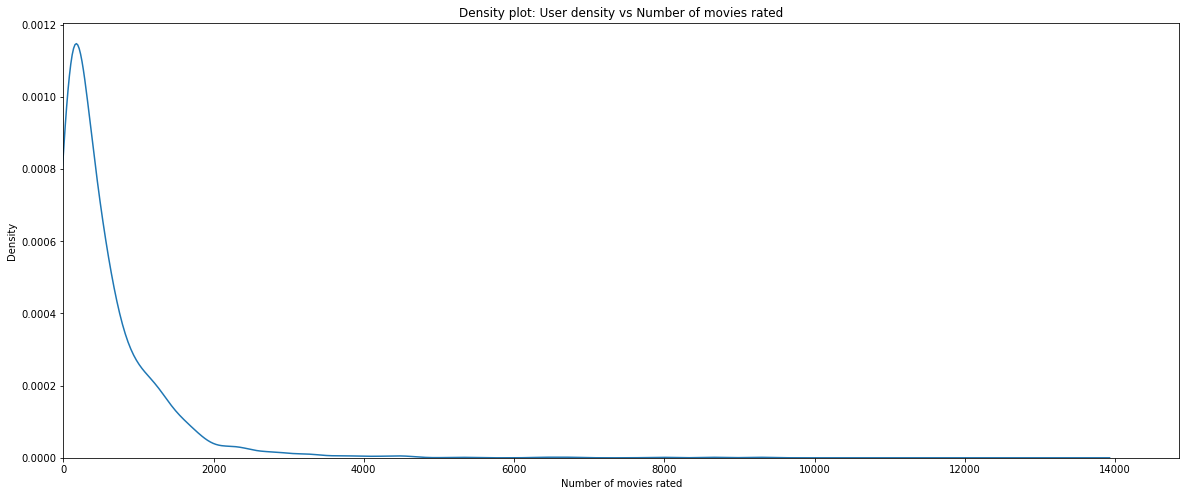

In [11]:
plt.figure(figsize=(20, 8))

# sns.kdeplot(df_ratings['useri'].value_counts())
df_ratings['user_id'].value_counts().plot(kind='density')
plt.title('Density plot: User density vs Number of movies rated')
plt.xlabel('Number of movies rated')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

**Note:** For the density plot: User density vs Number of movies rated

Most users rate less than 2,000 movies, a very small number of users rates more than 8,000 movies. In particular:

- User `1a4926479ca0b4c42df6cefb89aa59d9` has rated 9286 movies.
- User `030001ac2145a938b07e686a35a2d638` has rated 8663 movies.

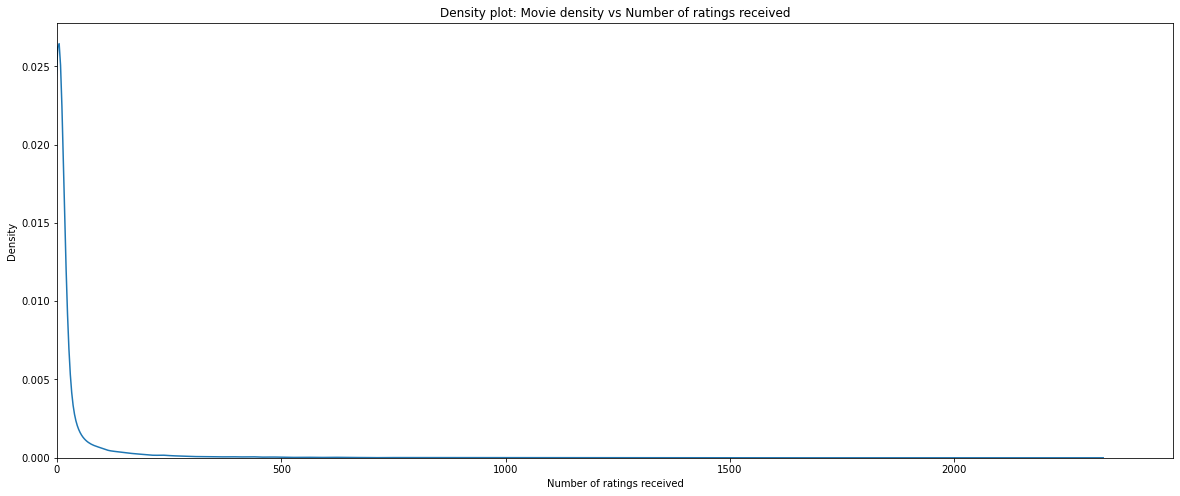

In [12]:
plt.figure(figsize=(20, 8))

df_ratings['movie_id'].value_counts().plot(kind='density')
plt.title('Density plot: Movie density vs Number of ratings received')
plt.xlabel('Number of ratings received')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

**Note:**
For the density plot: Movie density vs Number of ratings received

Most movies receive less than 500 ratings, a very small number of movies receives more than 1,000 ratings. Some examples of movie receiving more than 1,000 ratings are `2571`, `79132`, `356`, `4993`, and `2959`. 

#### Visualization: Occurrences of each rating

Inspect the occurrences of each rating in the `df_ratings` DataFrame.

In [13]:
df_ratings['rating'].value_counts()

4.0000    239177
3.5000    198997
3.0000    190944
4.5000    101245
2.5000     86004
5.0000     72279
2.0000     67028
1.0000     26397
1.5000     25279
0.5000     21401
Name: rating, dtype: int64

Generate bar plot to visualize the occurrence of each rating value in the `df_ratings` DataFrame.

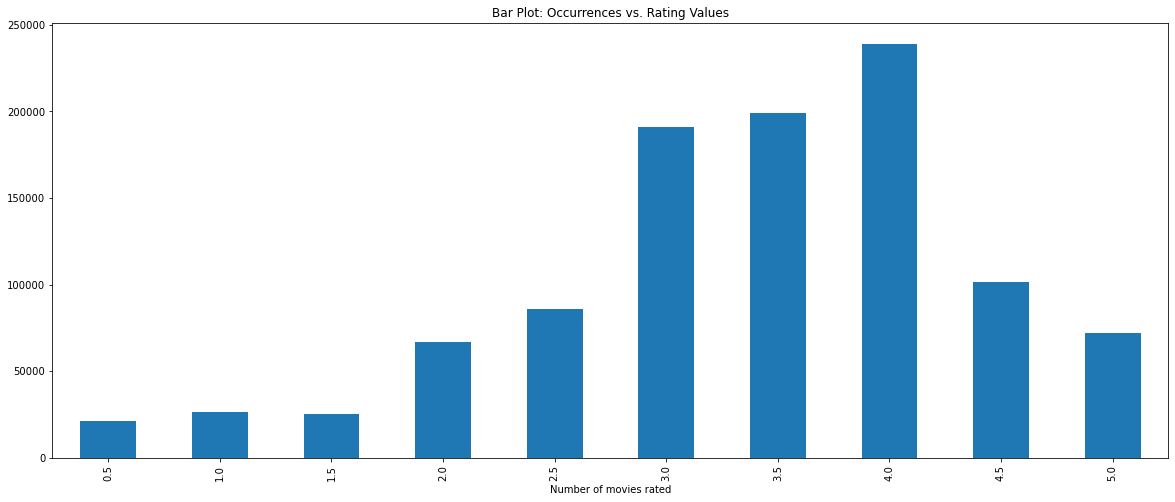

In [14]:
plt.figure(figsize=(20, 8))

# sns.kdeplot(df_ratings['useri'].value_counts())
df_ratings['rating'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot: Occurrences vs. Rating Values')
plt.xlabel('Number of movies rated')
# plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

**Note:** For the bar plot: Occurrences vs Rating values

The highest rating of all user rating received across all movies is 4.0, with more than 200k ratings.

## 2.2. File 2: `movies.csv` <a name="data-movies"></a>

This file is one of the MovieLens datasets downloaded from GroupLens website: https://grouplens.org/datasets/movielens/.

Load the data from `movies.csv` into a Pandas DataFrame called `df_movies` using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function. 

In [15]:
file_movies = f"{DIRECTORY}\\movies.csv"
df_movies = pd.read_csv(file_movies, skipinitialspace=True)

In [16]:
display(df_movies.head(5))
display(df_movies.shape)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


(62423, 3)

**Note:** There are 62,423 rows of data - before filtering duplicated values.

Check the info of the `df_movies` data frame.

In [17]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


**Note:** There are no missing values.

In [18]:
df_movies.describe()

,movieId
count,62423.0000
mean,122220.3876
std,63264.7448
min,1.0000
25%,82146.5000
50%,138022.0000
75%,173222.0000
max,209171.0000


In [19]:
df_movies.describe(include=[object])

,title,genres
count,62423,62423
unique,62325,1639
top,Slow Burn (2000),Drama
freq,2,9056


In [20]:
print(f"# unique movie IDs: {df_movies['movieId'].nunique()}")
print("Number of movies by ID:\n===")
print(df_movies['movieId'].value_counts())

print(f"\n# unique movie titles: {df_movies['title'].nunique()}")
print("Number of movies by title:\n===")
print(df_movies['title'].value_counts())

# unique movie IDs: 62423
Number of movies by ID:
===
133119    1
166788    1
80818     1
205745    1
76720     1
         ..
50802     1
56945     1
142959    1
140910    1
131072    1
Name: movieId, Length: 62423, dtype: int64

# unique movie titles: 62325
Number of movies by title:
===
Slow Burn (2000)                                     2
Good People (2014)                                   2
Truth (2015)                                         2
Noise (2007)                                         2
The Connection (2014)                                2
                                                    ..
Seeds of Death: Unveiling the Lies of GMOs (2012)    1
Tectonic Plate (2016)                                1
Tu£sday (2008)                                       1
Son of the Bride (Hijo de la novia, El) (2001)       1
Deadline - U.S.A. (1952)                             1
Name: title, Length: 62325, dtype: int64


**Note:** Some of the movies are recorded twice using different `movieId`s. Let's identify those movies.

In [21]:
movie_n_appearance = df_movies['title'].value_counts() > 1
movie_n_appearance_list = list(movie_n_appearance[movie_n_appearance].index)

movie_n_appearance_list[:5]

['Slow Burn (2000)',
 'Good People (2014)',
 'Truth (2015)',
 'Noise (2007)',
 'The Connection (2014)']

After inspection, it is concluded that there is possibility to have two movies with the same title in the `df_movies` DataFrame. For example, 'Frozen (2010)' appears twice in the DataFrame.

In [22]:
df_movies[df_movies['title'] == 'Frozen (2010)']

,movieId,title,genres
14424,75395,Frozen (2010),Drama|Horror|Thriller
23647,118818,Frozen (2010),Fantasy|Romance


These two movies have the same title and were released on 2010. After investigation, it is most likely that:

- 'Frozen (2010)' with `movieId = 75395` refers to an American film: https://en.wikipedia.org/wiki/Frozen_(2010_American_film)
- 'Frozen (2010)' with `movieId = 118818` refers to a Hong Kong film: https://en.wikipedia.org/wiki/Frozen_(2010_Hong_Kong_film)

Thus, it is safe to keep the assumption that each row of the `df_movies` DataFrame consists of entirely different movies from each other, even though they have the same title and release year. 

## 2.3 File 3: `personality-data.csv` <a name="data-personality"></a>

The `personality-data.csv` file consists of five columns indicating the assessment result of the user's personality:

- `openness`
- `agreeableness`
- `emotional_stability`
- `conscientiousness`
- `extraversion`

This information will be used for user attribute-based recommender system.

Load the data from `personality-data.csv` into a Pandas DataFrame called `df_personality` using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas-read-csv) function. 

In [23]:
file_personality = f"{DIRECTORY}\\personality-data.csv"
df_personality = pd.read_csv(file_personality, skipinitialspace=True)

Inspect the first 5 rows of `df_personality` DataFrame.

In [24]:
df_personality.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0000,2.0000,3.0000,2.5000,6.5000,serendipity,high,77658,4.4105,...,120138,4.2448,121372,4.3960,127152,4.1205,95311,4.0538,4,4
1,77c7d756a093150d4377720abeaeef76,7.0000,4.0000,6.0000,5.5000,4.0000,all,default,94959,4.2073,...,56782,4.0196,5618,3.9640,969,4.1742,1232,4.3349,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0000,3.0000,4.5000,2.0000,2.5000,serendipity,medium,110501,4.8681,...,2288,4.8232,3307,4.6768,1172,4.6493,1212,4.7450,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5000,5.5000,4.0000,4.5000,4.0000,popularity,medium,2905,4.5264,...,3030,4.4257,1281,4.4799,940,4.3551,905,4.3179,3,3
4,030001ac2145a938b07e686a35a2d638,5.5000,5.5000,3.5000,4.5000,2.5000,popularity,medium,2905,4.5264,...,3030,4.4257,1281,4.4799,940,4.3551,905,4.3179,2,3


Create new DataFrame: `df_personality_reduced` to extract only information about the user's personality.

In [25]:
list_personality = ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'emotional_stability']

df_personality_reduced = df_personality[['userid'] + [p for p in list_personality]]
df_personality_reduced.head()

,userid,openness,conscientiousness,extraversion,agreeableness,emotional_stability
0,8e7cebf9a234c064b75016249f2ac65e,5.0000,2.5000,6.5000,2.0000,3.0000
1,77c7d756a093150d4377720abeaeef76,7.0000,5.5000,4.0000,4.0000,6.0000
2,b7e8a92987a530cc368719a0e60e26a3,4.0000,2.0000,2.5000,3.0000,4.5000
3,92561f21446e017dd6b68b94b23ad5b7,5.5000,4.5000,4.0000,5.5000,4.0000
4,030001ac2145a938b07e686a35a2d638,5.5000,4.5000,2.5000,5.5000,3.5000


Inspect the information of `df_personality_reduced` DataFrame.

In [26]:
df_personality_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               1834 non-null   object 
 1   openness             1834 non-null   float64
 2   conscientiousness    1834 non-null   float64
 3   extraversion         1834 non-null   float64
 4   agreeableness        1834 non-null   float64
 5   emotional_stability  1834 non-null   float64
dtypes: float64(5), object(1)
memory usage: 86.1+ KB


In [27]:
df_personality_reduced.describe()

,openness,conscientiousness,extraversion,agreeableness,emotional_stability
count,1834.0000,1834.0000,1834.0000,1834.0000,1834.0000
mean,5.3765,4.6625,3.4856,4.2159,4.5616
std,1.0428,1.3115,1.4685,1.1379,1.3925
min,1.0000,1.0000,1.0000,1.0000,1.0000
25%,4.5000,4.0000,2.5000,3.5000,3.5000
50%,5.5000,4.5000,3.5000,4.0000,4.5000
75%,6.0000,5.5000,4.5000,5.0000,5.5000
max,7.0000,7.0000,7.0000,7.0000,7.0000


Plot the distribution of each user personality.

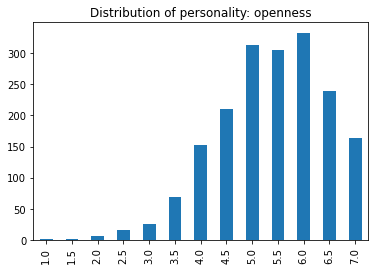

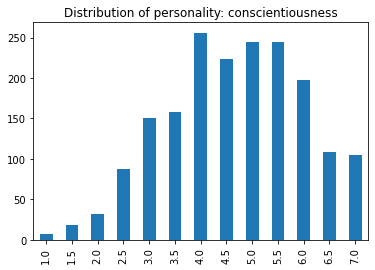

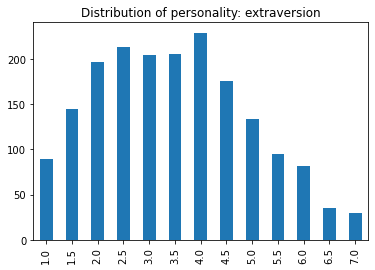

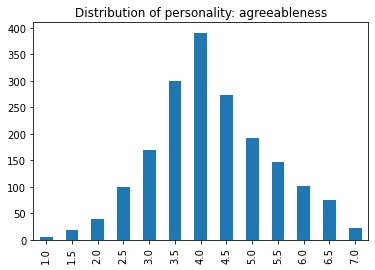

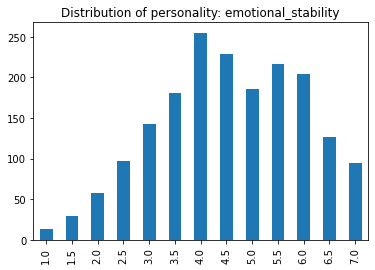

In [28]:
for p in list_personality:
    df_personality_reduced[p].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Distribution of personality: {p}")
    plt.show()

# 3. Data Analysis <a name="analysis"></a>

#### Ratings from `rating.csv`

Generate `pair_rating`: list of strings with user and movie pairs from `df_ratings` separated by underscore "_".

In [29]:
pair_rating = [
    f"{user}_{movie}" for user, movie in 
    zip(df_ratings['user_id'], df_ratings['movie_id'])
]

num_pair_rating = len(pair_rating)
print(f"# user-movie pairs: {num_pair_rating}")

# user-movie pairs: 1028751


Generate `pair_rating_dup`: list of duplicated entries from `pair_rating`.

In [30]:
# Defining the dict
d = defaultdict(lambda: 0)

for pair in pair_rating:
    d[pair] += 1

pair_rating_dup = [key for key, val in d.items() if val > 1]

print("How many duplicated entries are there?")
print(f"Answer: {len(pair_rating_dup)}\n")

print("What are the duplicated entries?")
display(pair_rating_dup[:50])

How many duplicated entries are there?
Answer: 5221

What are the duplicated entries?


['4638502dc978788ec9d44e64e43a6757_1',
 '4638502dc978788ec9d44e64e43a6757_19',
 '4638502dc978788ec9d44e64e43a6757_110',
 '4638502dc978788ec9d44e64e43a6757_176',
 '4638502dc978788ec9d44e64e43a6757_223',
 '4638502dc978788ec9d44e64e43a6757_224',
 '4638502dc978788ec9d44e64e43a6757_260',
 '4638502dc978788ec9d44e64e43a6757_293',
 '4638502dc978788ec9d44e64e43a6757_296',
 '4638502dc978788ec9d44e64e43a6757_337',
 '4638502dc978788ec9d44e64e43a6757_344',
 '4638502dc978788ec9d44e64e43a6757_356',
 '4638502dc978788ec9d44e64e43a6757_858',
 '4638502dc978788ec9d44e64e43a6757_1196',
 '4638502dc978788ec9d44e64e43a6757_1213',
 '4638502dc978788ec9d44e64e43a6757_1221',
 '4638502dc978788ec9d44e64e43a6757_1236',
 '4638502dc978788ec9d44e64e43a6757_1265',
 '4638502dc978788ec9d44e64e43a6757_1597',
 '4638502dc978788ec9d44e64e43a6757_1729',
 '4638502dc978788ec9d44e64e43a6757_2060',
 '4638502dc978788ec9d44e64e43a6757_2291',
 '4638502dc978788ec9d44e64e43a6757_2297',
 '4638502dc978788ec9d44e64e43a6757_2541',
 '463850

Generate `user_rating_dup`: extract duplicated users from `pair_rating_dup`.

In [31]:
# Display user with duplicated entries
user_rating_dup = set(user for user, _ in (pair.split(sep="_") for pair in pair_rating_dup))
display(user_rating_dup)

{'01e4e18e2e21b84ee1c5813fd5d3797f',
 '3e0c0afd46ee7366f328ddf1dae83479',
 '4638502dc978788ec9d44e64e43a6757',
 '5e82ce34f999ec0dbd2859b8b04dfcbf',
 '75a54727bffcbbb561da9d3eb604f28e',
 '9ba0ccf0a69ae15c85d1b289baa4d494',
 'c56613815b9f708eb9df7eb6afd42a49'}

**Note:** The 5,221 duplicated ratings are from 7 users in the `df_rating` DataFrame.

# 4. Data Preprocessing <a name="preprocessing"></a>

Generate dictionary for the user identifier in RapidMiner.

## 4.1. Remove Duplicates <a name="preprocessing-dup"></a>

Remove duplicated values from each DataFrame using Pandas [`drop_duplicates()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html) function.

- `df_ratings` → `df_ratings_unique`

In [32]:
df_ratings_unique = df_ratings.drop_duplicates(ignore_index=True)

print("New DataFrame:")
display(df_ratings_unique.head())

print(f"Shape (before): {df_ratings.shape}")
print(f"Shape (after): {df_ratings_unique.shape}")

New DataFrame:


,user_id,movie_id,rating,timestamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0000,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0000,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0000,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0000,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0000,2002-01-07 18:12:02


Shape (before): (1028751, 4)
Shape (after): (1020429, 4)


## 4.2. Reduce Amount of Ratings Data <a name="preprocessing-reduce"></a>

This step is very essential to reduce the dimension of the utility matrix. Recall `df_ratings_unique` by displaying its first 5 rows.

In [33]:
df_ratings_unique.head()

,user_id,movie_id,rating,timestamp
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0000,2001-09-10 17:19:56
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0000,2001-09-28 11:34:55
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0000,2001-09-28 11:42:50
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0000,2001-09-28 11:27:30
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0000,2002-01-07 18:12:02


Use Pandas [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html) function to inspect number of unique users and movies in the `df_ratings_unique` DataFrame.

In [34]:
print(f"# unique users: {df_ratings_unique['user_id'].nunique()}")
print(f"# unique movies: {df_ratings_unique['movie_id'].nunique()}")

# unique users: 1820
# unique movies: 35196


**Note:** Since there are **35,196 movies** in the utility matrix, the cosine similarity matrix for item comparison will have **35,196 rows** and **35,196 columns** respectively, which requires too much computational power to construct and takes too long to get the computations done!

The following steps deal with this issue by reducing the amount of data to be processed.

### 4.2.1. Filter by rating year <a name="preprocessing-year"></a>

Extract `year` from the `timestamp` column by using Pandas `apply()` function.  
Note that the `timestamp` column stores values of `str` type, not any date type. We keep it as it is for convenient manipulation.

In [35]:
df_ratings_unique['rating_year'] = (df_ratings_unique['timestamp']
                                    .apply(lambda x: x.split(sep="-")[0])) # shorthand
df_ratings_unique.head()

<ipython-input-35-26fd4dd52719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratings_unique['rating_year'] = (df_ratings_unique['timestamp']


,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,1,5.0000,2001-09-10 17:19:56,2001
1,8e7cebf9a234c064b75016249f2ac65e,2,4.0000,2001-09-28 11:34:55,2001
2,8e7cebf9a234c064b75016249f2ac65e,3,4.0000,2001-09-28 11:42:50,2001
3,8e7cebf9a234c064b75016249f2ac65e,5,5.0000,2001-09-28 11:27:30,2001
4,8e7cebf9a234c064b75016249f2ac65e,6,4.0000,2002-01-07 18:12:02,2002


Inspect the occurrences of ratings by year by using Pandas `value_counts()` function.

In [36]:
df_ratings_unique['rating_year'].value_counts()

2015    323462
2014     76253
2016     73526
2012     56849
2013     52690
2017     51811
2010     47072
2018     42303
2011     41343
2009     37947
2008     31569
2005     29129
2006     27633
2007     26946
2004     26354
2003     23042
2001     15843
2002     14069
2000     12774
1999      5826
2019      2467
1998      1142
1997       379
Name: rating_year, dtype: int64

Visualize the occurrences of ratings by year using a bar plot.

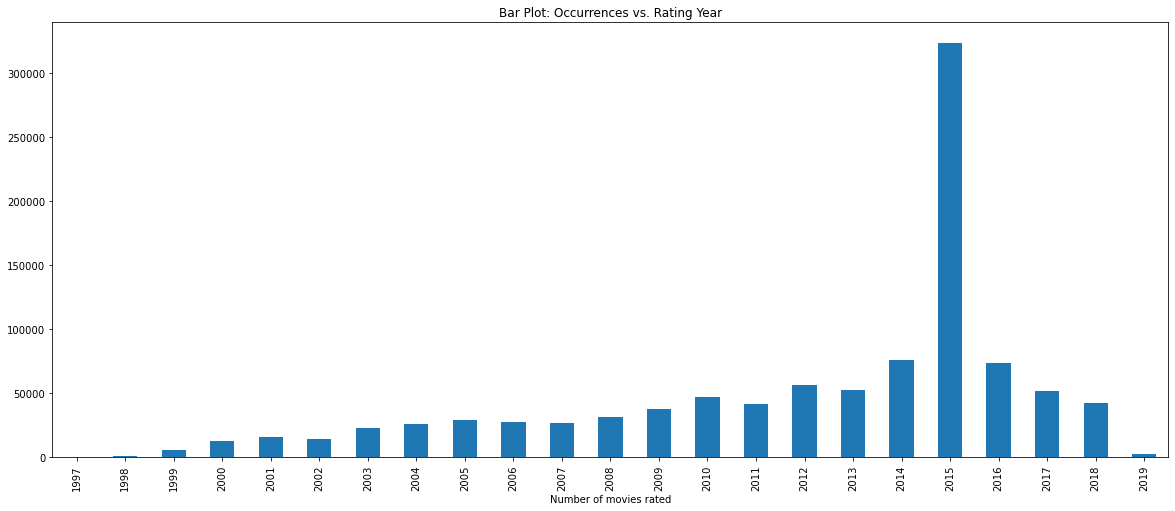

In [37]:
plt.figure(figsize=(20, 8))

df_ratings_unique['rating_year'].value_counts().sort_index().plot(kind='bar')
plt.title('Bar Plot: Occurrences vs. Rating Year')
plt.xlabel('Number of movies rated')
plt.ylim(ymin=0)
plt.show()

**Note:** The occurrences of ratings in 2015 is the highest in 2015, **exceeding 30,000**. This is also the only year with occurrenes of ratings over 10,000.

Define `year_threshold` and inspect total number of ratings before `year_threshold` (we will drop at least this much of ratings).

In [38]:
year_threshold = 2016

list_rating_is_before_year_threshold = (df_ratings_unique['rating_year']
                                        .apply(lambda x: int(x) < year_threshold))

list_rating_is_before_year_threshold.sum()

850322

Create new DataFrame `df_ratings_new`, which takes only ratings from `year_threshold` and beyond.

- `df_ratings_unique` → `df_ratings_new`

In [39]:
df_ratings_new = df_ratings_unique.copy()
df_ratings_new = (df_ratings_new.loc[~list_rating_is_before_year_threshold][:]
                  .reset_index(drop=True))

df_ratings_new

,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,18,2.5000,2017-05-22 17:37:52,2017
1,8e7cebf9a234c064b75016249f2ac65e,764,3.5000,2017-03-07 19:08:48,2017
2,8e7cebf9a234c064b75016249f2ac65e,1068,4.0000,2017-08-15 18:37:10,2017
3,8e7cebf9a234c064b75016249f2ac65e,1088,3.5000,2017-06-23 21:02:15,2017
4,8e7cebf9a234c064b75016249f2ac65e,1410,3.0000,2016-06-17 21:06:01,2016
...,...,...,...,...,...
170102,bad56d9506832cd79d874a6b66b3d813,190939,3.0000,2018-10-13 15:39:03,2018
170103,bad56d9506832cd79d874a6b66b3d813,192307,3.5000,2018-11-18 16:45:11,2018
170104,721ea658e148fc0f76ddd6e2b0e02422,53322,4.5000,2016-03-12 06:49:38,2016
170105,721ea658e148fc0f76ddd6e2b0e02422,54259,4.5000,2016-03-12 06:49:37,2016


**Note:** We have successfully reduced the number of ratings **from ~1M to 170,107**.

### 4.2.2. Filter ratings by movie count <a name="preprocessing-movie-count"></a>

Use Pandas [`nunique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.nunique.html) function to inspect occurrences of movies in the `df_ratings_new` DataFrame.

In [40]:
print(f"# unique users: {df_ratings_new['user_id'].nunique()}")
print(f"# unique movies: {df_ratings_new['movie_id'].nunique()}")

# unique users: 1183
# unique movies: 23558


Inspect number of ratings received by each movie.

In [41]:
movie_ratings_count = df_ratings_new.groupby('movie_id')['rating'].count().sort_values(ascending=False)
movie_ratings_count

movie_id
122904    617
122886    538
164179    534
134130    477
152081    429
         ... 
123647      1
123591      1
123589      1
123573      1
99448       1
Name: rating, Length: 23558, dtype: int64

**Note:** The movie that receives the highest number of ratings is `122904`, which has total number of 617 ratings.

Set threshold for occurrences of movies to be processed by the recommender system.

- `MOVIE_THRESHOLD`: A movie with less than `MOVIE_THRESHOLD` ratings will be removed.

In [42]:
MOVIE_THRESHOLD = 10

movie_ratings_count_above_threshold = (movie_ratings_count >= MOVIE_THRESHOLD)
movie_ratings_count_above_threshold.sum()

3781

Create new Pandas DataFrame `df_recent_ratings_n_hot_movies`, which stores only ratings for movies filtered by threshold value for occurrences of movies.

- `df_ratings_new` $\rightarrow$ `df_ratings_hot_movies`

In [43]:
movie_list = list(movie_ratings_count_above_threshold[movie_ratings_count_above_threshold].index)

df_ratings_hot_movies = df_ratings_new.copy()
movie_condition = (df_ratings_hot_movies['movie_id'].apply(lambda x: x in movie_list))

df_ratings_hot_movies = (df_ratings_hot_movies[movie_condition].reset_index(drop=True))
df_ratings_hot_movies

,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,18,2.5000,2017-05-22 17:37:52,2017
1,8e7cebf9a234c064b75016249f2ac65e,1088,3.5000,2017-06-23 21:02:15,2017
2,8e7cebf9a234c064b75016249f2ac65e,1665,2.5000,2017-09-18 21:51:20,2017
3,8e7cebf9a234c064b75016249f2ac65e,2642,1.0000,2017-01-05 17:33:43,2017
4,8e7cebf9a234c064b75016249f2ac65e,2643,2.5000,2018-11-03 15:39:11,2018
...,...,...,...,...,...
124850,bad56d9506832cd79d874a6b66b3d813,190939,3.0000,2018-10-13 15:39:03,2018
124851,bad56d9506832cd79d874a6b66b3d813,192307,3.5000,2018-11-18 16:45:11,2018
124852,721ea658e148fc0f76ddd6e2b0e02422,53322,4.5000,2016-03-12 06:49:38,2016
124853,721ea658e148fc0f76ddd6e2b0e02422,54259,4.5000,2016-03-12 06:49:37,2016


**Note:** We have further reduced the number of ratings **from 170,107 to 124,855**.

### 4.2.3. Filter ratings by user count <a name="preprocessing-user-count"></a>

Inspect the occurrences of ratings by user by using Pandas `value_counts()` function.

In [44]:
user_ratings_count = df_ratings_hot_movies['user_id'].value_counts()
user_ratings_count

9e725a43d8a4e561c0c31b7b8358832e    1331
b54372490fb6e3ccace51c0e3541db08    1156
ade0ba45447504c98ca80b4959a09dc1    1098
4553b9eb63ff23c392c5387e59499443     939
69dabc24fcb390fabac897dd18cbf349     851
                                    ... 
8de3f511c82a1a152ff16a986c2884c3       1
fc3e3e39a10fe337c5f0e8b982aa9493       1
ba2556d5acfa8e942d6d9daff1d3cdf4       1
023a329aa33c0b602f63ccfa83a08869       1
b682bcc838d091d6a17eceec700f865a       1
Name: user_id, Length: 1178, dtype: int64

Define `USER_THRESHOLD`. Then, inspect users with at least `USER_THRESHOLD` ratings.

In [45]:
USER_THRESHOLD = 20

user_ratings_count_above_threshold = (user_ratings_count >= USER_THRESHOLD)
user_ratings_count_above_threshold.sum()

925

Create new DataFrame `df_ratings_reduced`, which takes only ratings from users with at least `USER_THRESHOLD` ratings.

- `df_ratings_hot_movies` $\rightarrow$ `df_ratings_reduced`

In [46]:
user_list = list(user_ratings_count_above_threshold[user_ratings_count_above_threshold].index)

df_ratings_reduced = df_ratings_hot_movies.copy()
user_condition = (df_ratings_reduced['user_id'].apply(lambda x: x in user_list))

df_ratings_reduced = df_ratings_reduced[user_condition].reset_index(drop=True)
df_ratings_reduced

,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,18,2.5000,2017-05-22 17:37:52,2017
1,8e7cebf9a234c064b75016249f2ac65e,1088,3.5000,2017-06-23 21:02:15,2017
2,8e7cebf9a234c064b75016249f2ac65e,1665,2.5000,2017-09-18 21:51:20,2017
3,8e7cebf9a234c064b75016249f2ac65e,2642,1.0000,2017-01-05 17:33:43,2017
4,8e7cebf9a234c064b75016249f2ac65e,2643,2.5000,2018-11-03 15:39:11,2018
...,...,...,...,...,...
122528,bad56d9506832cd79d874a6b66b3d813,187595,4.0000,2018-06-01 17:12:03,2018
122529,bad56d9506832cd79d874a6b66b3d813,188797,3.0000,2018-11-18 16:47:15,2018
122530,bad56d9506832cd79d874a6b66b3d813,189203,3.5000,2018-06-07 19:20:30,2018
122531,bad56d9506832cd79d874a6b66b3d813,190939,3.0000,2018-10-13 15:39:03,2018


**Note:** We have further reduced the number of ratings **from 124,855 to 122,533**.

Unique movies from `df_ratings_reduced` DataFrame:

In [47]:
rated_movies = sorted(list(df_ratings_reduced['movie_id'].value_counts().index))
len(rated_movies)

3781

In [48]:
df_movies_reduced = df_movies[df_movies['movieId'].apply(lambda x: x in rated_movies)].reset_index(drop=True)
df_movies_reduced

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,5,Father of the Bride Part II (1995),Comedy
3,6,Heat (1995),Action|Crime|Thriller
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
3697,195161,Mary Poppins Returns (2018),Children|Fantasy
3698,195497,Vice (2018),Comedy|Drama
3699,195777,Mortal Engines (2018),Sci-Fi
3700,195823,The Christmas Chronicles (2018),Adventure|Children|Comedy|Fantasy


In RapidMiner, each movie must have at least one attribute ID associated to the movie. Therefore, movies without attributes are removed from the `df_ratings_reduced` DataFrame.

In [49]:
df_ratings_reduced.head()

,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,18,2.5000,2017-05-22 17:37:52,2017
1,8e7cebf9a234c064b75016249f2ac65e,1088,3.5000,2017-06-23 21:02:15,2017
2,8e7cebf9a234c064b75016249f2ac65e,1665,2.5000,2017-09-18 21:51:20,2017
3,8e7cebf9a234c064b75016249f2ac65e,2642,1.0000,2017-01-05 17:33:43,2017
4,8e7cebf9a234c064b75016249f2ac65e,2643,2.5000,2018-11-03 15:39:11,2018


In [50]:
movie_with_genres = list(df_movies_reduced['movieId'].value_counts().index)
len(movie_with_genres)

3702

In [51]:
df_ratings_reduced = (df_ratings_reduced[df_ratings_reduced['movie_id']
                                         .apply(lambda x: x in movie_with_genres)]
                      .reset_index(drop=True))

df_ratings_reduced

,user_id,movie_id,rating,timestamp,rating_year
0,8e7cebf9a234c064b75016249f2ac65e,18,2.5000,2017-05-22 17:37:52,2017
1,8e7cebf9a234c064b75016249f2ac65e,1088,3.5000,2017-06-23 21:02:15,2017
2,8e7cebf9a234c064b75016249f2ac65e,1665,2.5000,2017-09-18 21:51:20,2017
3,8e7cebf9a234c064b75016249f2ac65e,2642,1.0000,2017-01-05 17:33:43,2017
4,8e7cebf9a234c064b75016249f2ac65e,2643,2.5000,2018-11-03 15:39:11,2018
...,...,...,...,...,...
120596,bad56d9506832cd79d874a6b66b3d813,187595,4.0000,2018-06-01 17:12:03,2018
120597,bad56d9506832cd79d874a6b66b3d813,188797,3.0000,2018-11-18 16:47:15,2018
120598,bad56d9506832cd79d874a6b66b3d813,189203,3.5000,2018-06-07 19:20:30,2018
120599,bad56d9506832cd79d874a6b66b3d813,190939,3.0000,2018-10-13 15:39:03,2018


**Note:** We have further reduced the number of ratings **from 122,533 to 120,601**.

Save `df_ratings_reduced` into a local repository.

In [52]:
df_ratings_reduced.to_csv('output/ratings_reduced.csv', index=False)

### 4.2.4. Train-test split <a name="preprocess-split"></a>

In [74]:
df_ratings_train, df_ratings_test = train_test_split(
    df_ratings_reduced, stratify=df_ratings_reduced['user_id'], test_size=0.20, random_state=42)

print(f"# interactions on the Train set: {len(df_ratings_train)}")
print(f"# interactions on the Test set: {len(df_ratings_test)}")

# interactions on the Train set: 98026
# interactions on the Test set: 24507


In [75]:
df_ratings_test

,user_id,movie_id,rating,timestamp,rating_year
61384,8166a7a2d97e96ff235e46d3d30cd86d,1035,4.5000,2016-03-10 02:49:04,2016
26754,37e21126a2f31396aee6e8fe70c01d03,170629,3.0000,2017-05-21 00:49:22,2017
101849,d12803fe252733fa368b04a5ba1da3cc,5669,4.0000,2017-01-01 13:24:52,2017
23064,2fe22a501721ce8ce087120727b12a63,111384,4.0000,2016-07-27 17:26:33,2016
45220,64d1e60cade97f3f701aa5348c320a74,79091,0.5000,2016-01-03 17:39:32,2016
...,...,...,...,...,...
106920,da20cbe56b055831cb85b3266359f119,5902,4.0000,2017-03-23 15:17:51,2017
86494,b3e3e17c4942a528fa74bf0ef4928eb8,1320,3.0000,2016-01-10 13:49:19,2016
41286,5af58060b20eaf97e38ef38de5d023a2,7454,4.0000,2016-02-29 16:47:00,2016
92719,bba645691bc7e0fd7367213da7bca95f,3418,5.0000,2017-01-14 13:04:22,2017


Check if the list of users in both training and test sets are identical.

In [76]:
user_train = df_ratings_train['user_id'].unique()
user_test = df_ratings_test['user_id'].unique()

set(user_train) == set(user_test)

True

Sort training and test sets by `user_id` values, this is to enable more convenient analysis after generating result in RapidMiner. 

**Note:** The `user_id` column will be set to "user identification" role in RapidMiner's Set Role operator (required for Recommender Extension). The unique IDs are assigned to the specific ID number based on the order of occurrence from the given training and test data.

In [77]:
df_ratings_train = df_ratings_train.sort_values(by='user_id', ignore_index=True)

print(f"# unique users (training set): {len(df_ratings_train['user_id'].unique())}")
display(df_ratings_train)

# unique users (training set): 925


,user_id,movie_id,rating,timestamp,rating_year
0,00fa91e202f5e48aa34c05d97867fa74,1028,4.5000,2017-12-09 14:20:41,2017
1,00fa91e202f5e48aa34c05d97867fa74,55363,2.5000,2017-07-15 18:06:10,2017
2,00fa91e202f5e48aa34c05d97867fa74,5632,4.0000,2017-03-31 14:18:51,2017
3,00fa91e202f5e48aa34c05d97867fa74,73015,2.5000,2017-02-26 01:46:32,2017
4,00fa91e202f5e48aa34c05d97867fa74,122916,4.0000,2018-06-09 23:28:14,2018
...,...,...,...,...,...
98021,ffff31b8d1dd1486a7fe6914761aa655,142488,5.0000,2016-07-10 13:58:18,2016
98022,ffff31b8d1dd1486a7fe6914761aa655,135133,3.0000,2016-07-10 14:00:55,2016
98023,ffff31b8d1dd1486a7fe6914761aa655,158966,5.0000,2017-01-10 17:54:42,2017
98024,ffff31b8d1dd1486a7fe6914761aa655,109848,2.5000,2017-06-04 15:52:35,2017


In [78]:
df_ratings_test = df_ratings_test.sort_values(by='user_id', ignore_index=True)

print(f"# unique users (test set): {len(df_ratings_test['user_id'].unique())}")
display(df_ratings_test)

# unique users (test set): 925


,user_id,movie_id,rating,timestamp,rating_year
0,00fa91e202f5e48aa34c05d97867fa74,122902,2.5000,2016-05-16 10:33:38,2016
1,00fa91e202f5e48aa34c05d97867fa74,1210,4.5000,2017-08-15 15:33:45,2017
2,00fa91e202f5e48aa34c05d97867fa74,62155,4.0000,2017-07-15 18:08:35,2017
3,00fa91e202f5e48aa34c05d97867fa74,177689,4.0000,2018-04-28 21:57:36,2018
4,00fa91e202f5e48aa34c05d97867fa74,165549,4.0000,2016-12-29 02:17:41,2016
...,...,...,...,...,...
24502,ffff31b8d1dd1486a7fe6914761aa655,168252,4.0000,2017-07-15 14:59:04,2017
24503,ffff31b8d1dd1486a7fe6914761aa655,167064,4.5000,2018-09-24 16:55:03,2018
24504,ffff31b8d1dd1486a7fe6914761aa655,182715,3.0000,2018-04-23 18:07:54,2018
24505,ffff31b8d1dd1486a7fe6914761aa655,184399,4.5000,2018-12-30 16:45:38,2018


Save training and test data to be used for RapidMiner processing.

In [79]:
df_ratings_train.to_csv('output/ratings_train.csv', index=False)
df_ratings_test.to_csv('output/ratings_test.csv', index=False)

## 4.3. Generate Attributes for Movies <a name="preprocess-movie-attr"></a>

Now, create a new column: `genre_list` in `df_movies` DataFrame to store the `genres` into a list of strings.

In [56]:
df_movies_reduced['genre_list'] = df_movies_reduced['genres'].apply(lambda x: x.split(sep='|'))
df_movies_reduced

,movieId,title,genres,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,"[Adventure, Children, Fantasy]"
2,5,Father of the Bride Part II (1995),Comedy,[Comedy]
3,6,Heat (1995),Action|Crime|Thriller,"[Action, Crime, Thriller]"
4,7,Sabrina (1995),Comedy|Romance,"[Comedy, Romance]"
...,...,...,...,...
3697,195161,Mary Poppins Returns (2018),Children|Fantasy,"[Children, Fantasy]"
3698,195497,Vice (2018),Comedy|Drama,"[Comedy, Drama]"
3699,195777,Mortal Engines (2018),Sci-Fi,[Sci-Fi]
3700,195823,The Christmas Chronicles (2018),Adventure|Children|Comedy|Fantasy,"[Adventure, Children, Comedy, Fantasy]"


Create `genre_set` consisting of all genres in the `genre_list` column.

In [57]:
genre_set = set(list(pd.core.common.flatten(df_movies_reduced['genre_list'])))
genre_dict = {g: i for i, g in enumerate(sorted(list(genre_set)))}
genre_dict

{'(no genres listed)': 0,
 'Action': 1,
 'Adventure': 2,
 'Animation': 3,
 'Children': 4,
 'Comedy': 5,
 'Crime': 6,
 'Documentary': 7,
 'Drama': 8,
 'Fantasy': 9,
 'Film-Noir': 10,
 'Horror': 11,
 'IMAX': 12,
 'Musical': 13,
 'Mystery': 14,
 'Romance': 15,
 'Sci-Fi': 16,
 'Thriller': 17,
 'War': 18,
 'Western': 19}

Apply the Pandas DataFrame function: [`explode()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) to split entries into different rows when there are multiple entries in the `genre_list`.

In [58]:
df_movies_explode = df_movies_reduced.explode('genre_list').reset_index(drop=True)
df_movies_explode

,movieId,title,genres,genre_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy
...,...,...,...,...
9411,195823,The Christmas Chronicles (2018),Adventure|Children|Comedy|Fantasy,Fantasy
9412,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Drama
9413,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Mystery
9414,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Sci-Fi


Create `genre_id` column, storing the genre ID at each row. 

In [59]:
df_movies_explode['genre_id'] = df_movies_explode['genre_list'].apply(lambda x: genre_dict[x])
df_movies_explode

,movieId,title,genres,genre_list,genre_id
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Adventure,2
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Animation,3
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Children,4
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Comedy,5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Fantasy,9
...,...,...,...,...,...
9411,195823,The Christmas Chronicles (2018),Adventure|Children|Comedy|Fantasy,Fantasy,9
9412,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Drama,8
9413,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Mystery,14
9414,196997,Black Mirror: Bandersnatch (2018),Drama|Mystery|Sci-Fi|Thriller,Sci-Fi,16


Create new DataFrame: `df_movies_genre` with only two columns: `movieId` and `genre_id`.

In [60]:
df_movies_genre = df_movies_explode[['movieId', 'genre_id']]
df_movies_genre

,movieId,genre_id
0,1,2
1,1,3
2,1,4
3,1,5
4,1,9
...,...,...
9411,195823,9
9412,196997,8
9413,196997,14
9414,196997,16


In [61]:
df_movies_genre.to_csv('output/movies_genre.csv', index=False)

## 4.4. Generate Attributes for Users <a name="preprocess-user-attr"></a>

Generate list 25 user attribute IDs according to 5 personality traits (The Big 5 Personality) - each personality trait is divided into 5 degrees.

In [62]:
list_personality_degree = ['low', 'midlow', 'mid', 'midhigh', 'high']

# List personality + list personality degree = attribute ID
dict_personality_degree = {}

count = 0
for p in list_personality:
    for d in list_personality_degree:
        dict_personality_degree[f"{p}_{d}"] = count
        count += 1
        
dict_personality_degree

{'openness_low': 0,
 'openness_midlow': 1,
 'openness_mid': 2,
 'openness_midhigh': 3,
 'openness_high': 4,
 'conscientiousness_low': 5,
 'conscientiousness_midlow': 6,
 'conscientiousness_mid': 7,
 'conscientiousness_midhigh': 8,
 'conscientiousness_high': 9,
 'extraversion_low': 10,
 'extraversion_midlow': 11,
 'extraversion_mid': 12,
 'extraversion_midhigh': 13,
 'extraversion_high': 14,
 'agreeableness_low': 15,
 'agreeableness_midlow': 16,
 'agreeableness_mid': 17,
 'agreeableness_midhigh': 18,
 'agreeableness_high': 19,
 'emotional_stability_low': 20,
 'emotional_stability_midlow': 21,
 'emotional_stability_mid': 22,
 'emotional_stability_midhigh': 23,
 'emotional_stability_high': 24}

Assign user attribute IDs to each user - each user is assigned 5 IDs, one per personality trait.

In [63]:
def assign_personality_degree(val, personality=""):
    f = lambda x: f"{personality}_{x}" if personality != "" else x
    
    if val <= 2.0:
        return dict_personality_degree[f('low')]
    
    if val < 4.0:
        return dict_personality_degree[f('midlow')]
    
    if val == 4.0:
        return dict_personality_degree[f('mid')]
    
    if val < 6.0:
        dict_personality_degree[f('midhigh')]
    
    return dict_personality_degree[f('high')]


for p in list_personality:
    df_personality_reduced[f"{p}_degree"] = (df_personality_reduced[p]
                                             .apply(lambda x: assign_personality_degree(x, p)))

df_personality_reduced.head()

<ipython-input-63-b23e3b0bc24f>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personality_reduced[f"{p}_degree"] = (df_personality_reduced[p]


,userid,openness,conscientiousness,extraversion,agreeableness,emotional_stability,openness_degree,conscientiousness_degree,extraversion_degree,agreeableness_degree,emotional_stability_degree
0,8e7cebf9a234c064b75016249f2ac65e,5.0000,2.5000,6.5000,2.0000,3.0000,4,6,14,15,21
1,77c7d756a093150d4377720abeaeef76,7.0000,5.5000,4.0000,4.0000,6.0000,4,9,12,17,24
2,b7e8a92987a530cc368719a0e60e26a3,4.0000,2.0000,2.5000,3.0000,4.5000,2,5,11,16,24
3,92561f21446e017dd6b68b94b23ad5b7,5.5000,4.5000,4.0000,5.5000,4.0000,4,9,12,19,22
4,030001ac2145a938b07e686a35a2d638,5.5000,4.5000,2.5000,5.5000,3.5000,4,9,11,19,21


Create new DataFrame `df_personality_degree` consisting only the user ID and their respective attribute IDs.

In [64]:
df_personality_degree = df_personality_reduced[['userid'] + [f"{p}_degree" for p in list_personality]]
df_personality_degree

,userid,openness_degree,conscientiousness_degree,extraversion_degree,agreeableness_degree,emotional_stability_degree
0,8e7cebf9a234c064b75016249f2ac65e,4,6,14,15,21
1,77c7d756a093150d4377720abeaeef76,4,9,12,17,24
2,b7e8a92987a530cc368719a0e60e26a3,2,5,11,16,24
3,92561f21446e017dd6b68b94b23ad5b7,4,9,12,19,22
4,030001ac2145a938b07e686a35a2d638,4,9,11,19,21
...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,4,7,14,16,21
1830,1ab3a4c2921d8da640854819b0f6cfce,2,7,11,16,24
1831,a06386edadf3bc614dadb7044708c46c,4,6,14,16,24
1832,bad56d9506832cd79d874a6b66b3d813,4,6,11,16,20


Create new column: `personality_list` - storing list of 5 user attribute IDs per user.

In [65]:
df_personality_degree['personality_list'] = (df_personality_degree[[f"{p}_degree" for p in list_personality]]
                                             .values.tolist())

df_personality_degree.head()

<ipython-input-65-bed46be7d9bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_personality_degree['personality_list'] = (df_personality_degree[[f"{p}_degree" for p in list_personality]]


,userid,openness_degree,conscientiousness_degree,extraversion_degree,agreeableness_degree,emotional_stability_degree,personality_list
0,8e7cebf9a234c064b75016249f2ac65e,4,6,14,15,21,"[4, 6, 14, 15, 21]"
1,77c7d756a093150d4377720abeaeef76,4,9,12,17,24,"[4, 9, 12, 17, 24]"
2,b7e8a92987a530cc368719a0e60e26a3,2,5,11,16,24,"[2, 5, 11, 16, 24]"
3,92561f21446e017dd6b68b94b23ad5b7,4,9,12,19,22,"[4, 9, 12, 19, 22]"
4,030001ac2145a938b07e686a35a2d638,4,9,11,19,21,"[4, 9, 11, 19, 21]"


Remove other columns from `df_personality_degree`, except `userId` and `personality_list`.

In [66]:
df_personality_degree = df_personality_degree[['userid', 'personality_list']]

display(df_personality_degree.head())
display(df_personality_degree.shape)

,userid,personality_list
0,8e7cebf9a234c064b75016249f2ac65e,"[4, 6, 14, 15, 21]"
1,77c7d756a093150d4377720abeaeef76,"[4, 9, 12, 17, 24]"
2,b7e8a92987a530cc368719a0e60e26a3,"[2, 5, 11, 16, 24]"
3,92561f21446e017dd6b68b94b23ad5b7,"[4, 9, 12, 19, 22]"
4,030001ac2145a938b07e686a35a2d638,"[4, 9, 11, 19, 21]"


(1834, 2)

Remove users who did not rate enough movies from the dataset.

In [67]:
# # use back user_list
user_condition = (df_personality_degree['userid'].apply(lambda x: x in user_list))
df_personality_degree = df_personality_degree[user_condition]

display(df_personality_degree.head())
display(df_personality_degree.shape)

,userid,personality_list
0,8e7cebf9a234c064b75016249f2ac65e,"[4, 6, 14, 15, 21]"
1,77c7d756a093150d4377720abeaeef76,"[4, 9, 12, 17, 24]"
2,b7e8a92987a530cc368719a0e60e26a3,"[2, 5, 11, 16, 24]"
3,92561f21446e017dd6b68b94b23ad5b7,"[4, 9, 12, 19, 22]"
4,030001ac2145a938b07e686a35a2d638,"[4, 9, 11, 19, 21]"


(938, 2)

Apply the Pandas DataFrame function: [`explode()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) to split `personality_test` into different rows.

In [68]:
df_personality_degree_explode = df_personality_degree.explode('personality_list')
df_personality_degree_explode.columns = ['userid', 'personality_id']
print(f"Shape (before): {df_personality_degree_explode.shape}")

df_personality_degree_explode = df_personality_degree_explode.drop_duplicates(ignore_index=True)
print(f"Shape (after): {df_personality_degree_explode.shape}")
display(df_personality_degree_explode.head())

Shape (before): (4690, 2)
Shape (after): (4625, 2)


,userid,personality_id
0,8e7cebf9a234c064b75016249f2ac65e,4
1,8e7cebf9a234c064b75016249f2ac65e,6
2,8e7cebf9a234c064b75016249f2ac65e,14
3,8e7cebf9a234c064b75016249f2ac65e,15
4,8e7cebf9a234c064b75016249f2ac65e,21


Save user personality data for RapidMiner processing.

In [69]:
df_personality_degree_explode.to_csv('output/user_personality.csv', index=False)